In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
with open ("output.log") as f:
    data_lines = f.readlines()[1::2]
clean_data = [word.rstrip().lstrip().split(":")  for data_line in data_lines for word in data_line.split('\t') if word != '']
clean_data

[['iter', ' 904'],
 ['time per iter', ' 0.0145'],
 ['Epoch time', ' 13.14'],
 ['average_loss',
  ' [1.2326243329479034, 1.141440673218679, nan, 0.9015857551612106, 0.7864352390653901, 1.4176996871829033, 0.9453017879277468, 1.0578230042736252, 0.9683815937439005, 0.9802692861670685]'],
 ['average_reward',
  ' [0.37214015588992855, 0.10531540790858912, 0.1489751226775145, -0.16503293587688753, -0.27886914186510037, 0.017472172493760228, 0.17889956659156464, 0.006489497521976784, 0.04852132660991456, 0.1304584305637793]'],
 ['iter', ' 946'],
 ['time per iter', ' 0.0088'],
 ['Epoch time', ' 8.37'],
 ['average_loss',
  ' [1.5220624, 1.2490118, 0.9606809411972305, 0.8348227, 0.7188752, 0.8826109, 1.0124099, 0.9279743, 0.94638616, 0.8317317]'],
 ['average_reward',
  ' [0.23656802758946854, 0.42885202450066934, -0.05711530698072986, 0.5103506310448243, 0.11541428236637412, 0.07705055633122979, 0.4716882521755385, 0.20344691498964865, -0.14619838567004967, 0.5070376460256552]'],
 ['iter', ' 76

In [112]:

loss_data_dict = {key:[] for key in dict(clean_data).keys()}
loss_data_dict

{'iter': [],
 'time per iter': [],
 'Epoch time': [],
 'average_loss': [],
 'average_reward': []}

In [113]:
for i in range(0,len(clean_data),len(loss_data_dict)):
    for j in range(len(loss_data_dict)):
        k = clean_data[i+j][0]
        v = clean_data[i+j][1]
        v = v.replace('nan', 'np.nan')

        eval_v = eval(v)
            
        loss_data_dict[k].append(eval_v)

robot_count = len(loss_data_dict['average_loss'][0])
epochs_range = len(loss_data_dict['iter'])
loss_data_dict['average_loss'] = np.array(loss_data_dict['average_loss'])
loss_data_dict['average_reward'] = np.array(loss_data_dict['average_reward'])

In [114]:
loss_data_dict['average_loss'].shape

(259, 10)

In [115]:
rows = 5
cols = 2

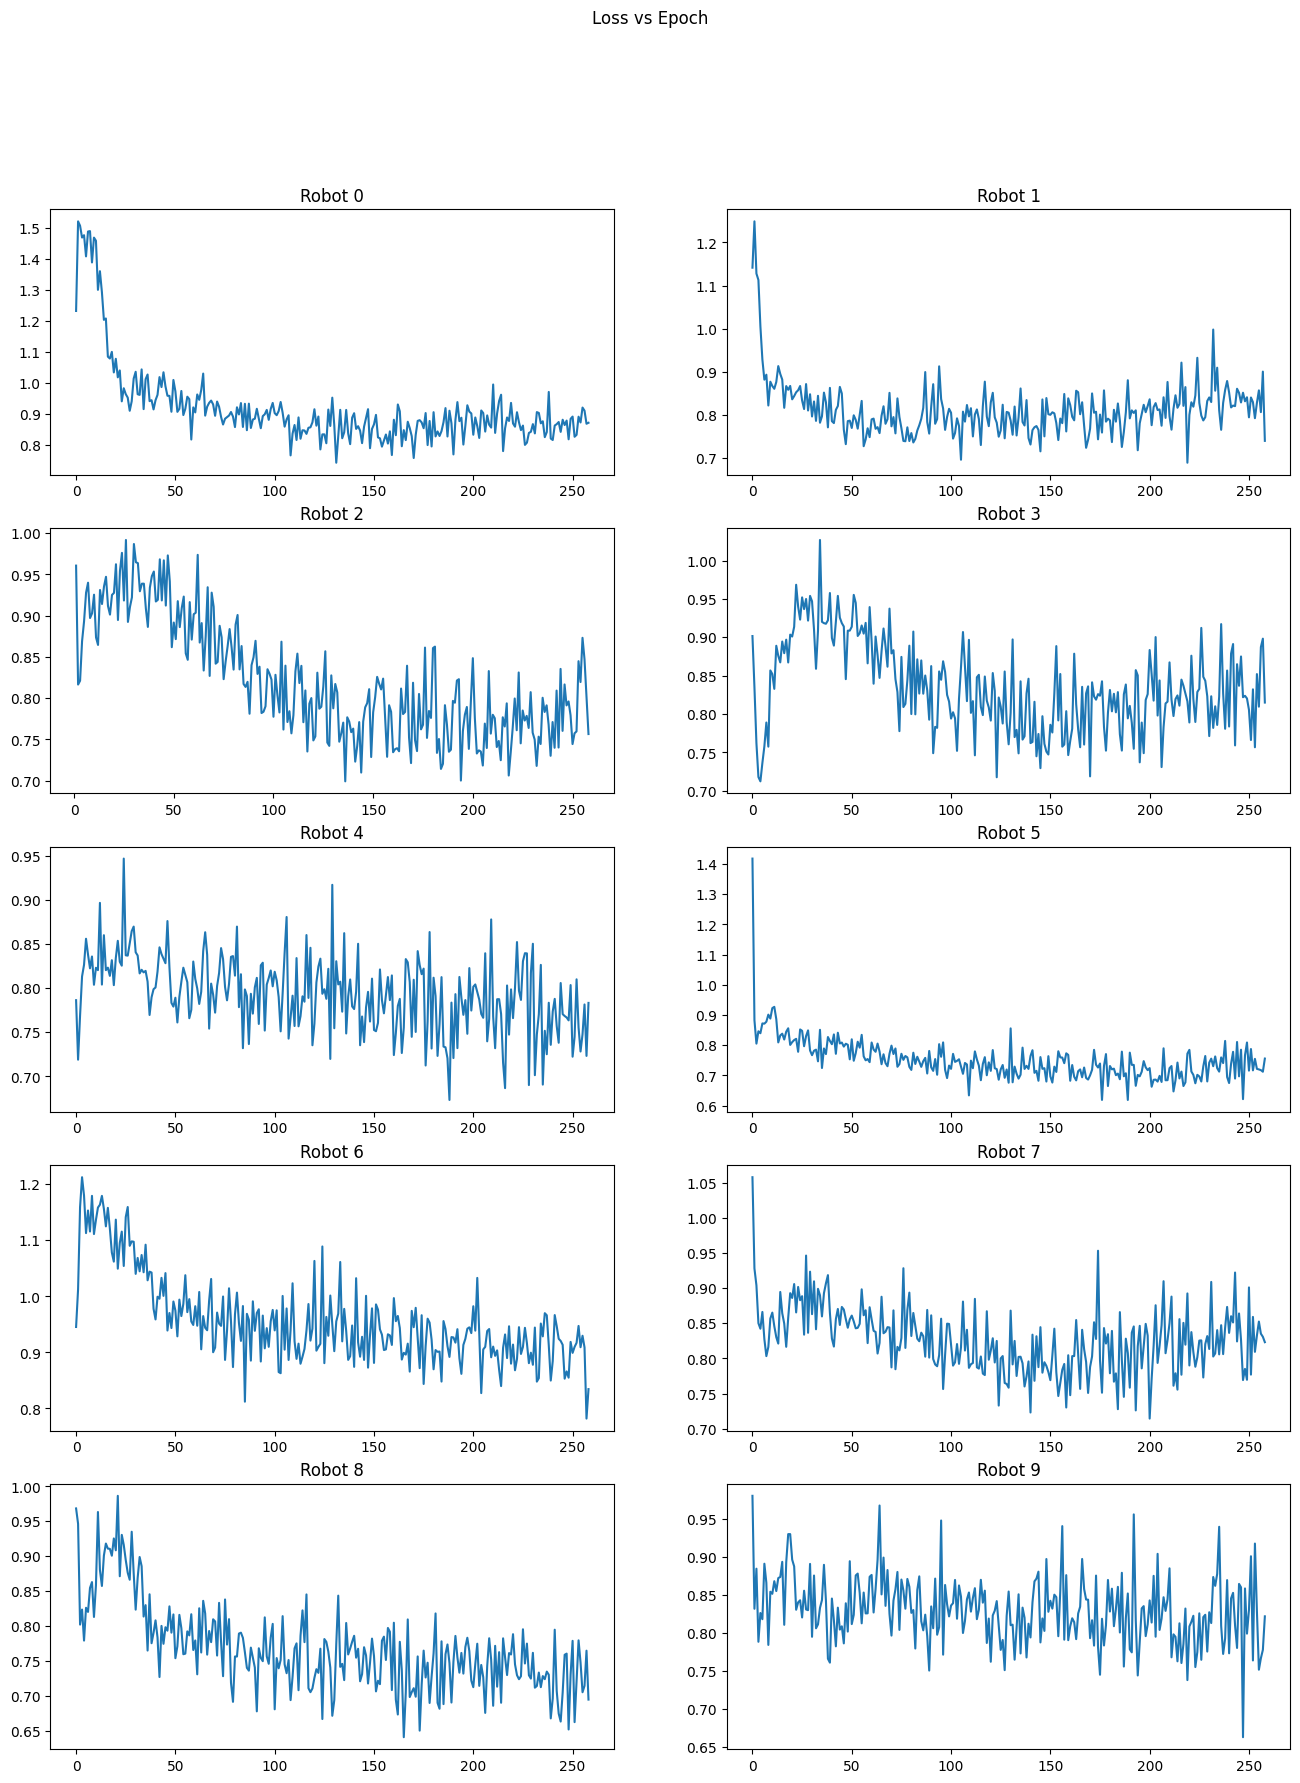

In [116]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(16,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_loss'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Loss vs Epoch')
plt.savefig("4_robot_loss.png")
plt.show()


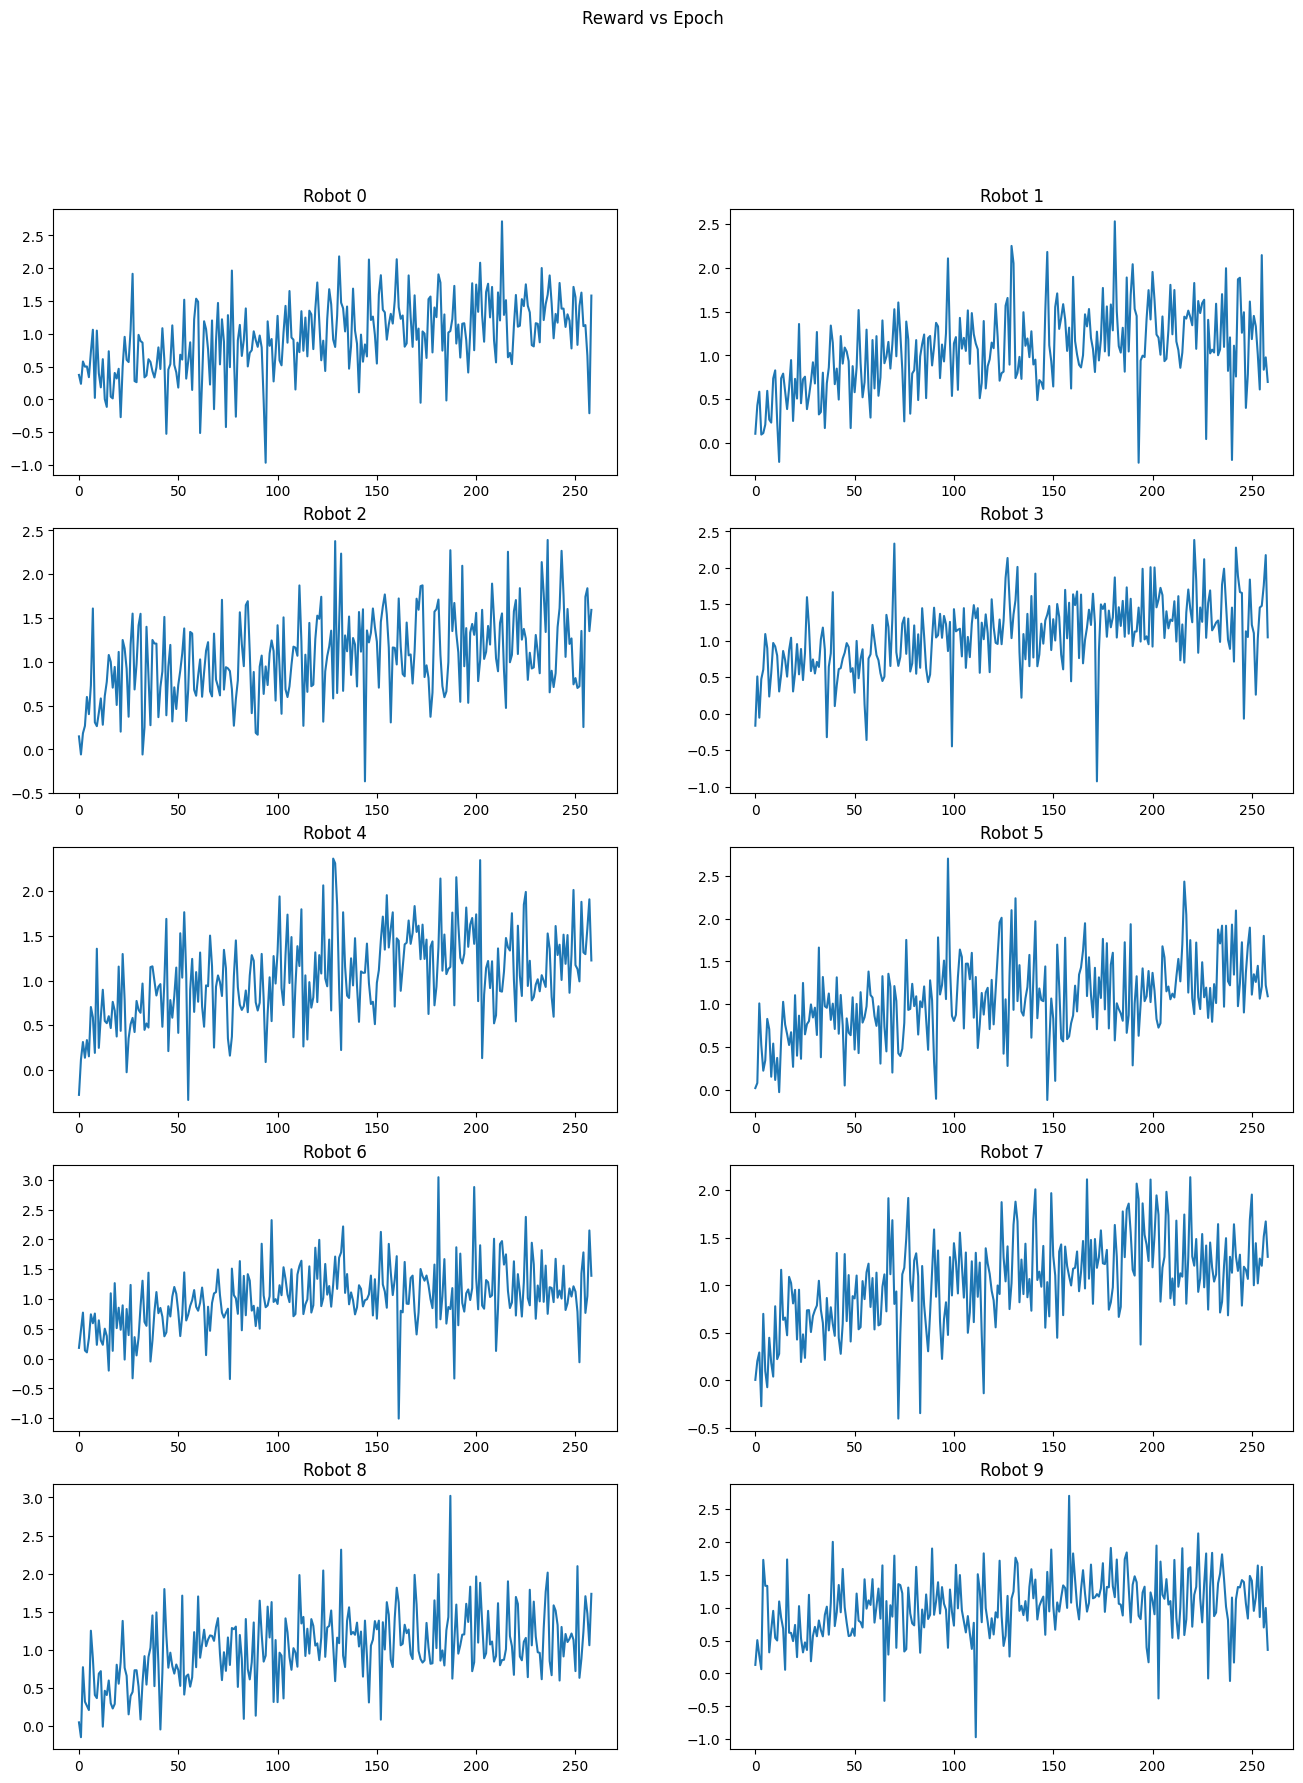

In [117]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(16,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_reward'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Reward vs Epoch')
plt.savefig("4_robot_reward.png")
plt.show()

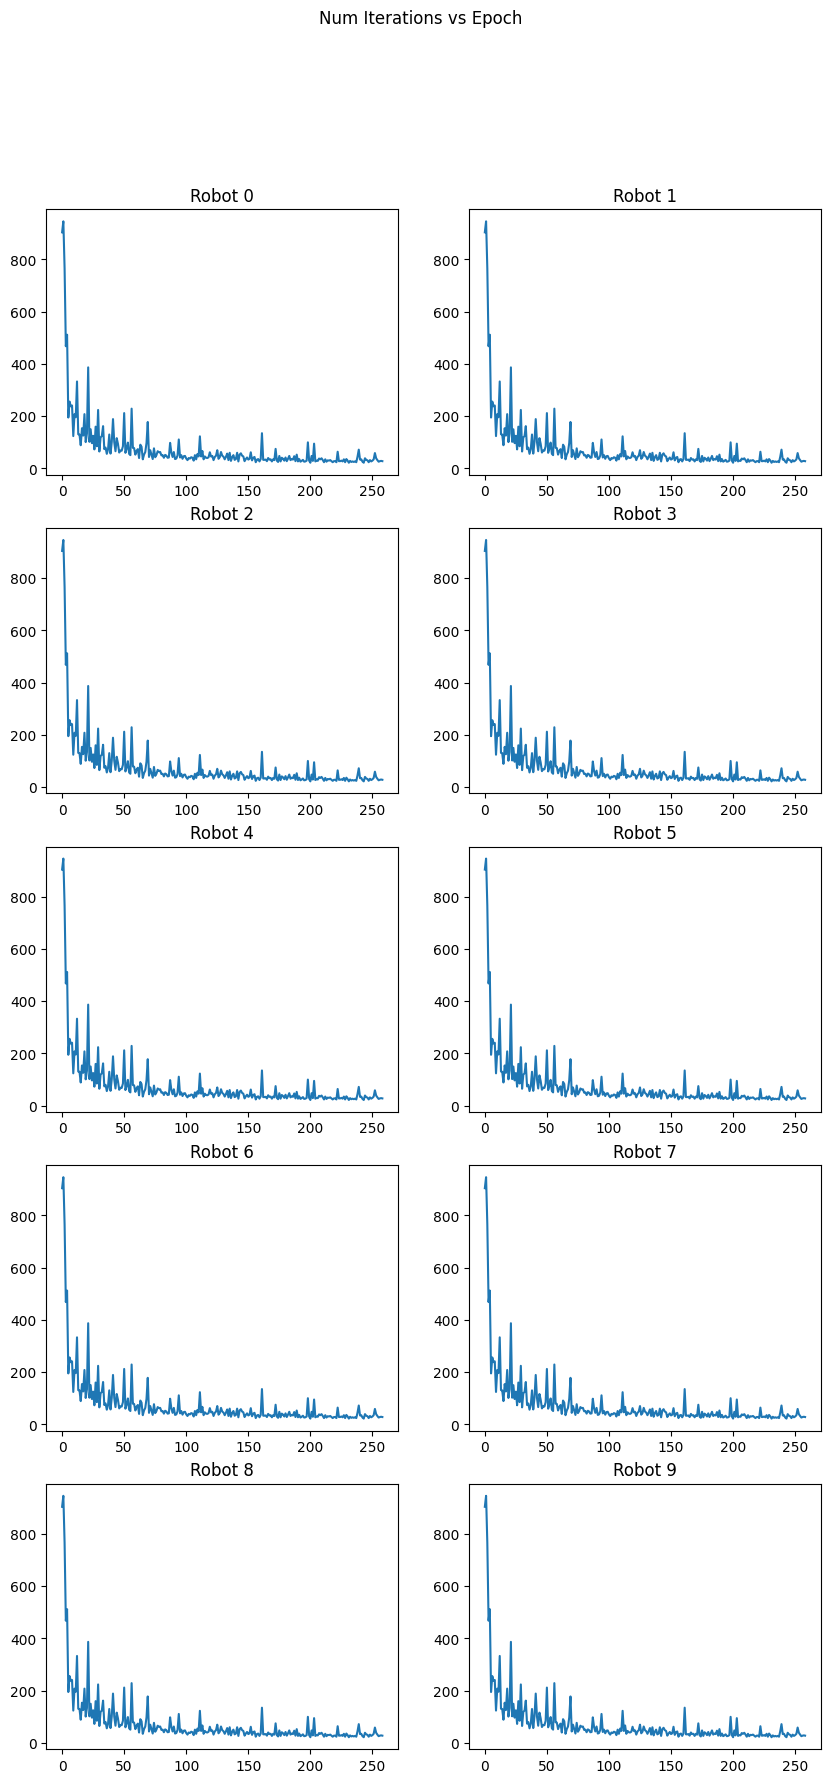

In [118]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['iter'][:])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Num Iterations vs Epoch')
plt.savefig("4_robot_iter.png")
plt.show()

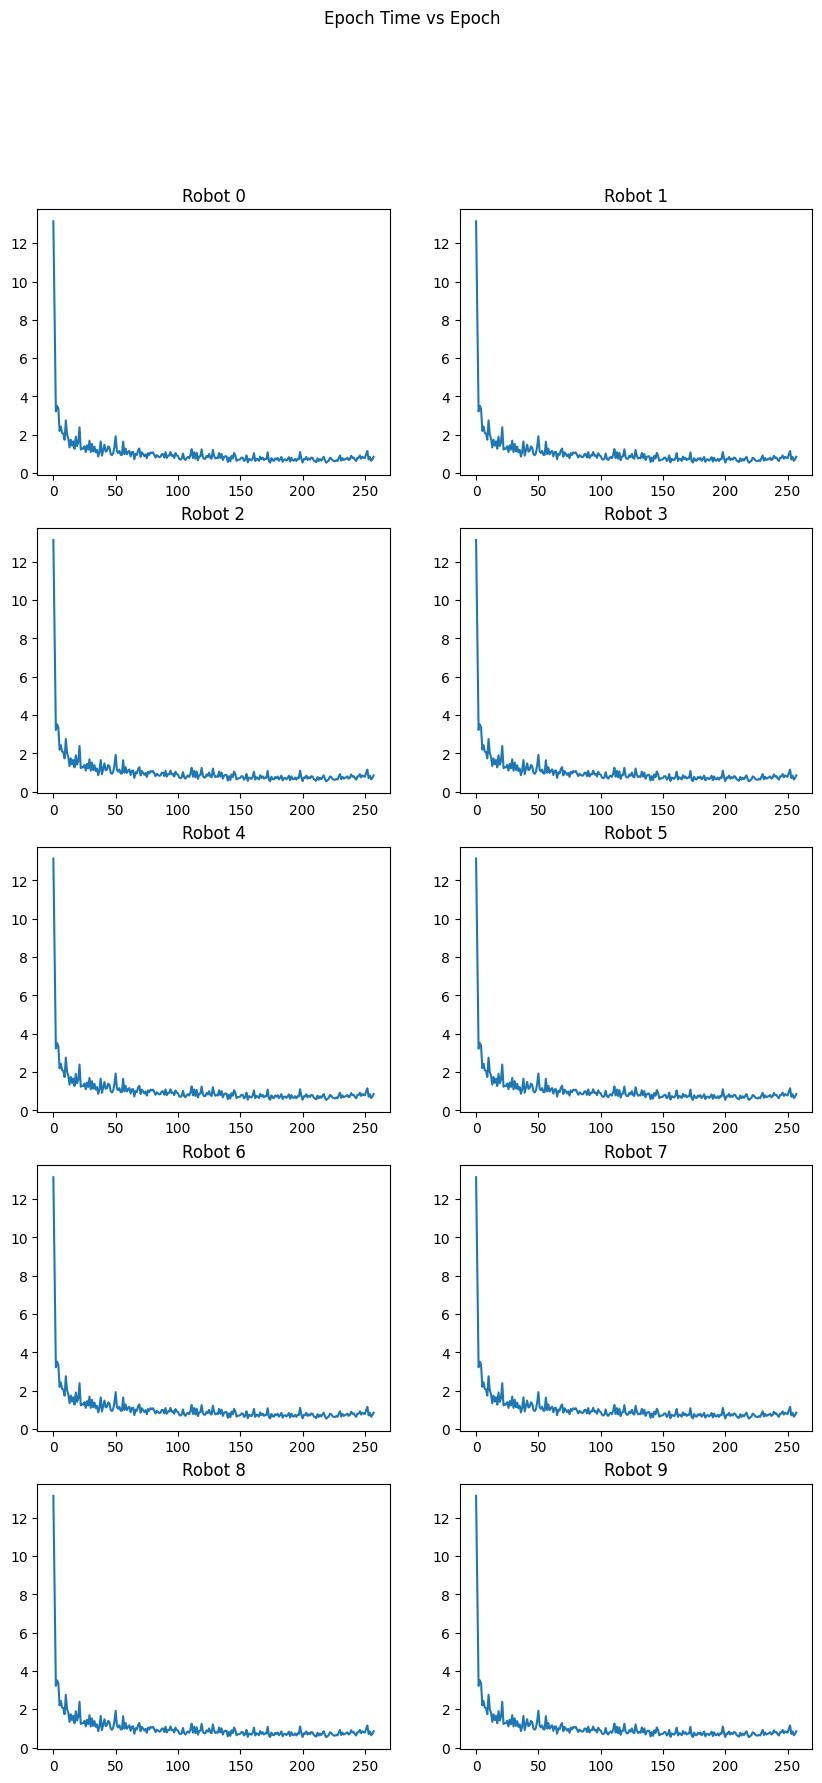

In [119]:
fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(10,20))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:-1],loss_data_dict['Epoch time'][:-1])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Epoch Time vs Epoch')
plt.savefig("4_robot_time.png")
plt.show()